In [21]:
import random
import string
# Image:一個畫布
# ImageDraw:一個畫筆
# ImageFont:畫筆的字體
from PIL import Image, ImageDraw, ImageFont
from matplotlib.pyplot import imshow
import numpy as np


In [22]:
# !pip install pillow

In [23]:
class Captcha(object):
    # 生成幾位數的驗證碼
    number = 1
    # 驗證碼圖片的高度和寬度
    size = (135, 39)
    # 驗證碼字體大小
    fontsize = 32
    #加入幹擾線條數
    line_number = 2

    #構建一個驗證碼源文本
    SOURCE = list(string.ascii_uppercase)
    # for index in range(0, 10):
    #     SOURCE.append(str(index))

    #用來繪制幹擾線
    @classmethod
    def __gene_line(cls, draw, width, height):
        begin = (random.randint(width*-1, width), random.randint(height*-1, height))
        end = (random.randint(int(width/2), width), random.randint(0, height))
        draw.line([begin, end], fill=cls.__gene_random_color(0,200), width=3)

    # 用來繪制幹擾點
    @classmethod
    def __gene_points(cls, draw, point_chance, width, height):
        chance = min(100, max(0, int(point_chance))) #大小限制在[0, 100]
        for w in range(width):
            for h in range(height):
                tmp = random.randint(0, 100)
                if tmp > 100 - chance:
                    draw.point((w, h), fill=cls.__gene_random_color())

    # 生成隨機的顏色
    @classmethod
    def __gene_random_color(cls, start=0, end=255):
        random.seed()
        return (random.randint(0, 250),random.randint(0, 250), random.randint(0, 250), random.randint(start, end))

    # 生成隨機的文字顏色
    @classmethod
    def __gene_random_font_color(cls, start=0, end=255):
        random.seed()
        return (random.randint(0, 50),random.randint(0, 50), random.randint(0, 50), random.randint(start, end))

    # 隨機選擇一個字體
    @classmethod
    def __gene_random_font(cls):
        fonts = ['Times-New-Roman.ttf']
        font = random.choice(fonts)
        return '/content/drive/MyDrive/ProJ_Proofnum/font/' + font

    # 用來隨機生成一個字符串
    @classmethod
    def gene_text(cls, number):
        #num是生成驗證碼的位數
        return ''.join(random.sample(cls.SOURCE, number))

    # 生成驗證碼
    @classmethod
    def gene_graph_captcha(cls):
        #驗證碼圖片的高和寬
        width, height = cls.size

        #驗證碼的字體
        font = ImageFont.truetype(cls.__gene_random_font(), cls.fontsize)
        
        #創建圖片
        image = Image.new('RGBA', (width,height),cls.__gene_random_color(20, 80))
        
        #創建畫筆
        draw = ImageDraw.Draw(image)
        #繪制幹擾線
        for x in range(0, random.randint(4,6)):
            cls.__gene_line(draw, width, height)
        all_text=''
        #創建字體
        for i in range(4):
          #生成字符串
          text = cls.gene_text(cls.number)
          all_text+=text
          #獲取字體尺寸
          font_width, font_height = font.getsize(text)

          #生成文字透明背板
          blank = Image.new('RGBA',(font_width,font_height))
          #生成文字畫部
          temp = ImageDraw.Draw(blank)
          #寫字
          temp.text((0,0),text,font=font,fill=cls.__gene_random_font_color(200, 250))
          #文字背板旋轉
          ram_angle=random.randint(-30,30)
          rotated_txt=blank.rotate(ram_angle, resample=Image.BILINEAR,expand=1)
          #貼到驗證碼整張背板上
          ram_width=random.randint(-10,10)
          ram_height=random.randint(-2,2)
          image.paste(rotated_txt,(13+i*(4+27)+ram_width, int((height-font_height)/2)+ram_height),rotated_txt)
          #填充字符串
          # draw.text(((width - 15font_width) / (4-i), (height - font_height) / 2), text, font=font,
          #           fill=cls.__gene_random_color(0, 255))
          # if (font_width<27):
          #   draw.text((15+i*(5+font_width), (height - font_height) / 2), text, font=font,
          #             fill=cls.__gene_random_color(0, 255))
          # else:
          # draw.text((13+i*(2+27)+ram_width, ((height-font_height)/2)+ram_height), text, font=font,
          #           fill=cls.__gene_random_color(0, 255))
          
        # imshow(np.asarray(blank))
        #繪制噪點
        cls.__gene_points(draw, 2, width, height)
        return (all_text, image)

In [24]:
# !pip install utils

SZRS
<PIL.Image.Image image mode=RGBA size=135x39 at 0x7F3015EC4BA8>


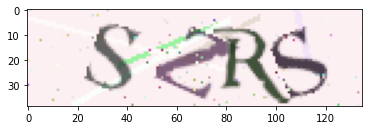

In [25]:
def main():
    text, image = Captcha.gene_graph_captcha()
    print(text)
    print(image)
    imshow(np.asarray(image))
    # out.seek(0)
    # return resp
main()